In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [10]:
df=pd.read_csv("data/Diwali Sales Data.csv",encoding='unicode_escape')

In [13]:
df.shape

(11251, 15)

In [16]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [22]:
pd.isnull(df).sum()
df.dropna(inplace=True)        

In [26]:
df["Amount"]=df["Amount"].astype("int")

In [28]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


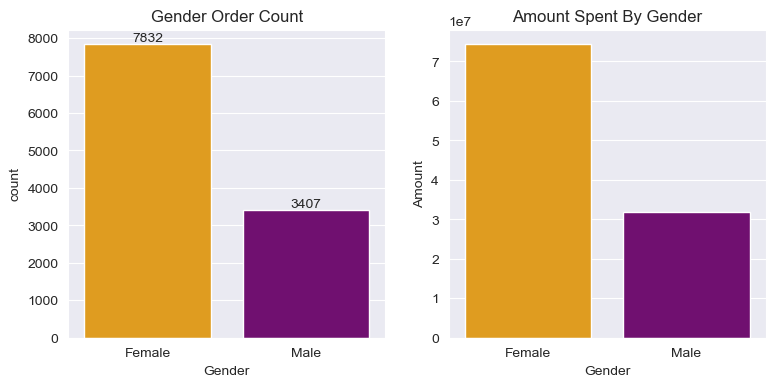

In [77]:
plt.figure(figsize=(9,4))
labels=["Female","Male"]

sns.set_style('darkgrid')   
custom_palette=['orange','purple']   
sns.set_palette(custom_palette) 

plt.subplot(1,2,1)
plt.title("Gender Order Count")
ax = sns.countplot(x="Gender",data=df)
ax.set_xticklabels(labels)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.subplot(1,2,2)
plt.title("Amount Spent By Gender")
sales_gen=df.groupby(["Gender"],as_index=False)["Amount"].sum()
sns.barplot(x="Gender",y="Amount", data=sales_gen)
plt.xticks(sales_gen.index,labels=labels)

plt.show()


We can infer from the above graphs that most of the buyers are females and even the purchasing power of females is greater than men

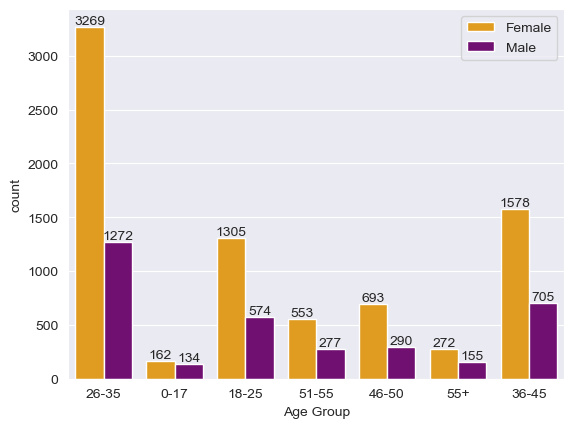

In [87]:
sns.set_style('darkgrid')   
custom_palette=['orange','purple']   
sns.set_palette(custom_palette) 
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Female','Male'], bbox_to_anchor=(1,1))

for bars in ax.containers:
    ax.bar_label(bars)

    

<Axes: xlabel='Age Group', ylabel='Amount'>

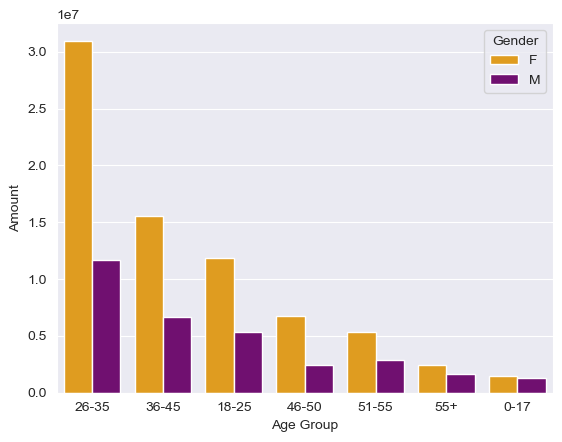

In [88]:
sales_age = df.groupby(['Age Group','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Age Group',y= 'Amount',hue="Gender" ,data = sales_age)

From above graphs we can see that most of the buyers are of age group between 26-35 yrs female

<Axes: xlabel='State', ylabel='Orders'>

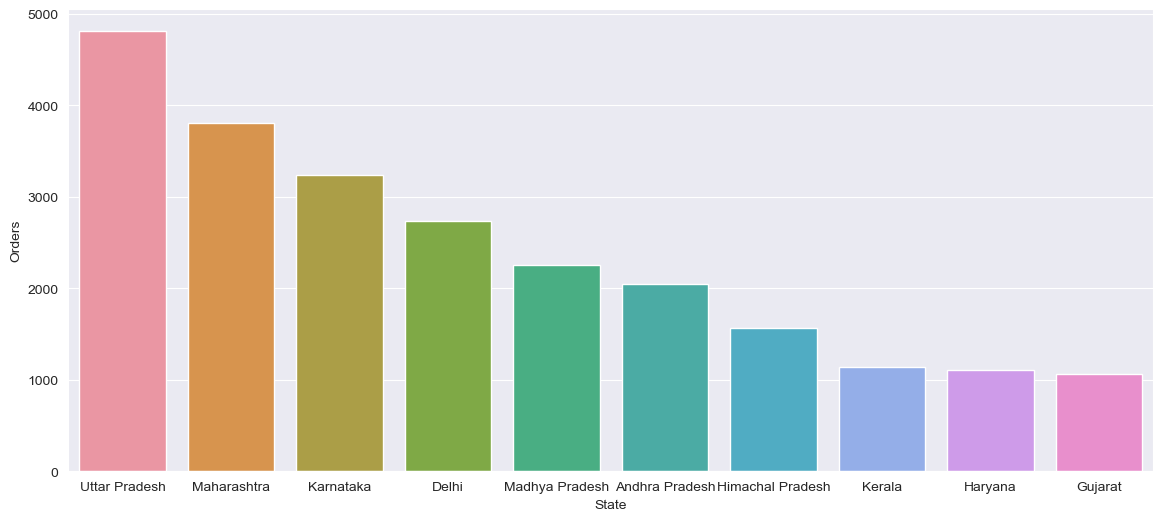

In [107]:
plt.figure(figsize=(14,6))
states_orders=df.groupby(["State"],as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.barplot(data=states_orders,x="State",y="Orders")

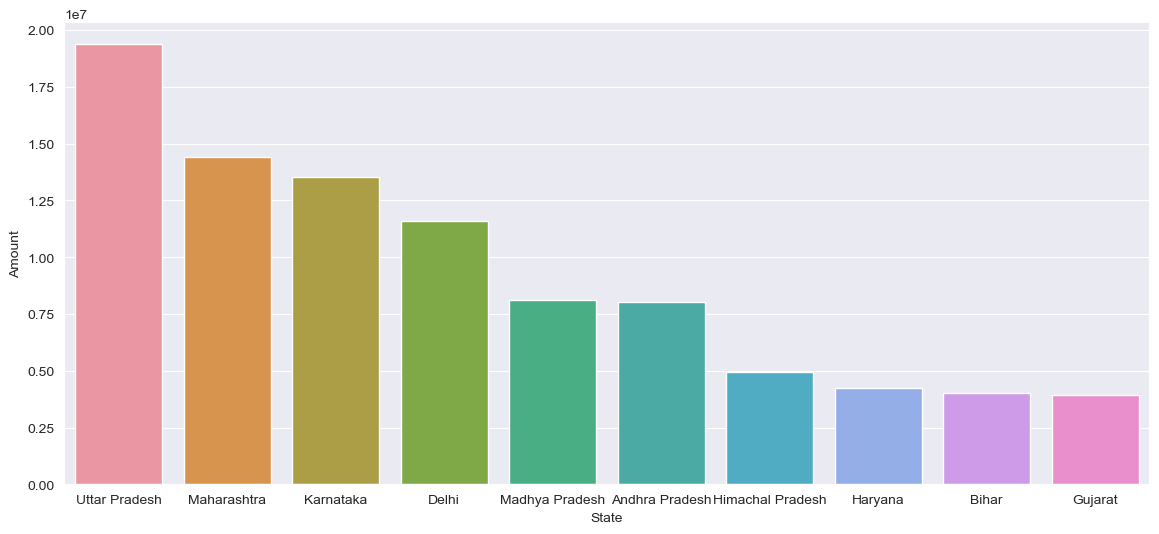

In [118]:
plt.figure(figsize=(14,6))
states_orders=df.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.barplot(data=states_orders,x="State",y="Amount")

plt.show()

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

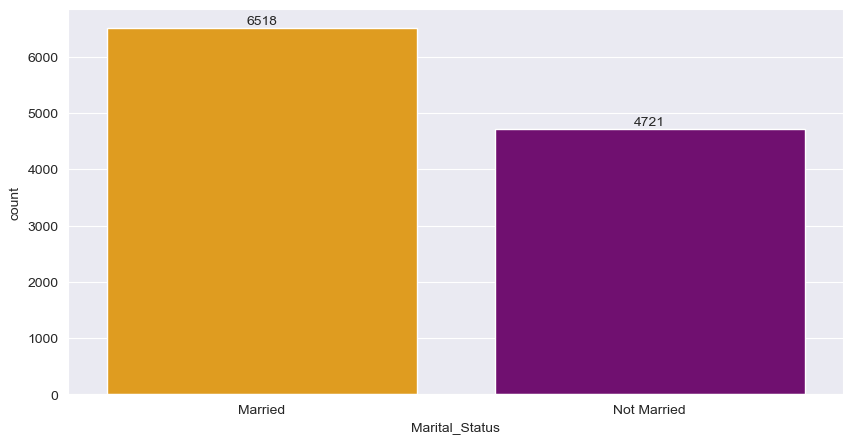

In [115]:
plt.figure(figsize=(10,5))
labels=["Married","Not Married"]

sns.set_style('darkgrid')   
custom_palette=['orange','purple']   
sns.set_palette(custom_palette) 


ax = sns.countplot(x="Marital_Status",data=df)
ax.set_xticklabels(labels)
for bars in ax.containers:
    ax.bar_label(bars)

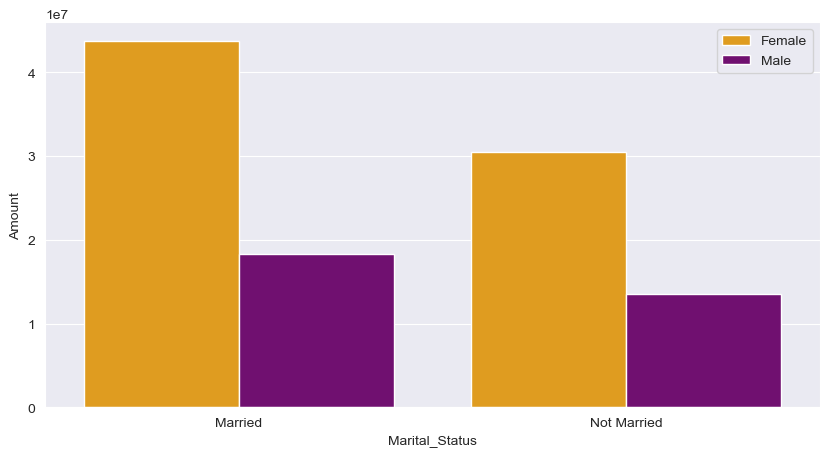

In [117]:
plt.figure(figsize=(10,5))
labels=["Married","Not Married"]

sns.set_style('darkgrid')   
custom_palette=['orange','purple']   
sns.set_palette(custom_palette) 


sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax=sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

ax.set_xticklabels(labels)
legend_handles, _= ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Female','Male'], bbox_to_anchor=(1,1))

plt.show()

From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

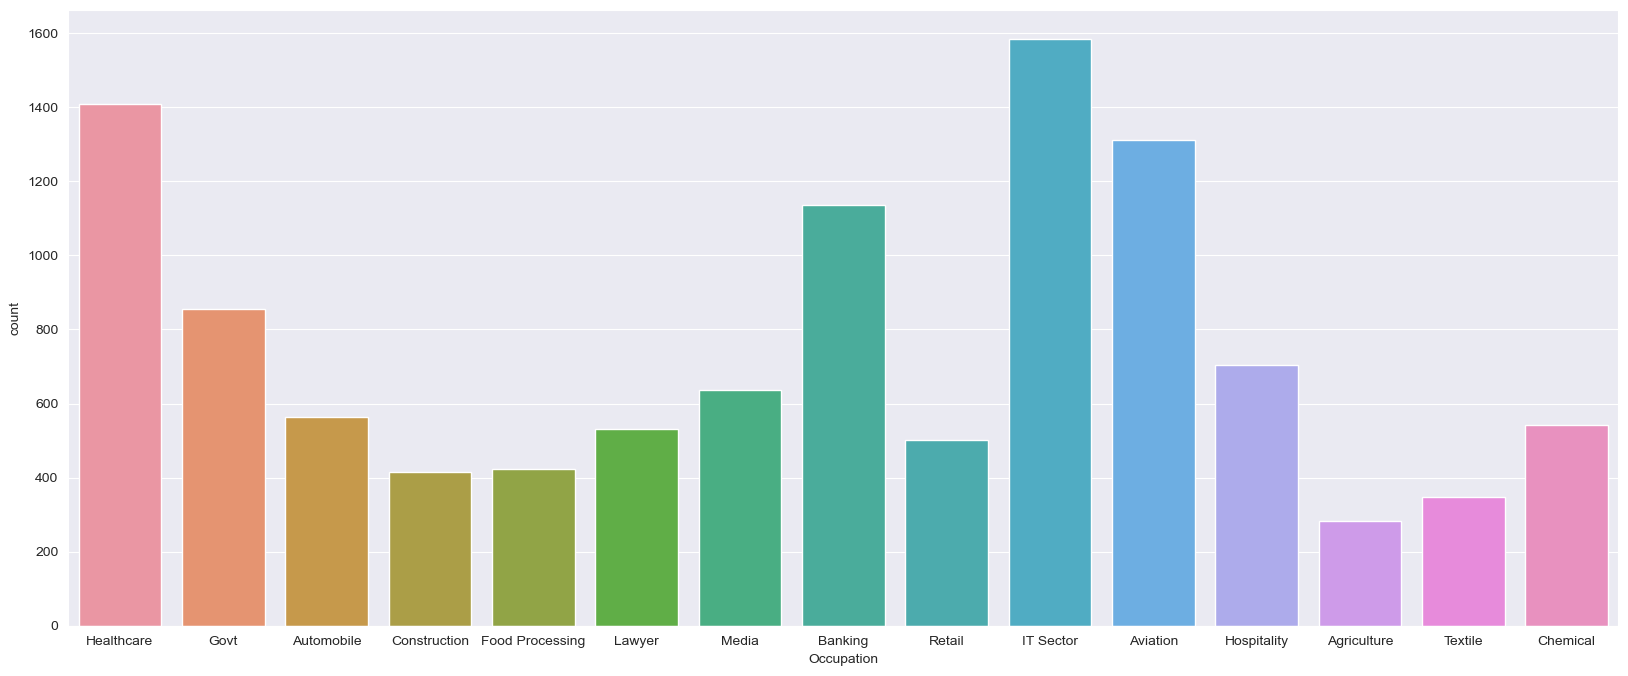

In [128]:
plt.figure(figsize=(20,8))

sns.set_style('darkgrid')   
custom_palette=['orange','purple']   
sns.set_palette(custom_palette) 

sns.countplot(x="Occupation",data=df)
plt.show()


<Axes: xlabel='Occupation', ylabel='Amount'>

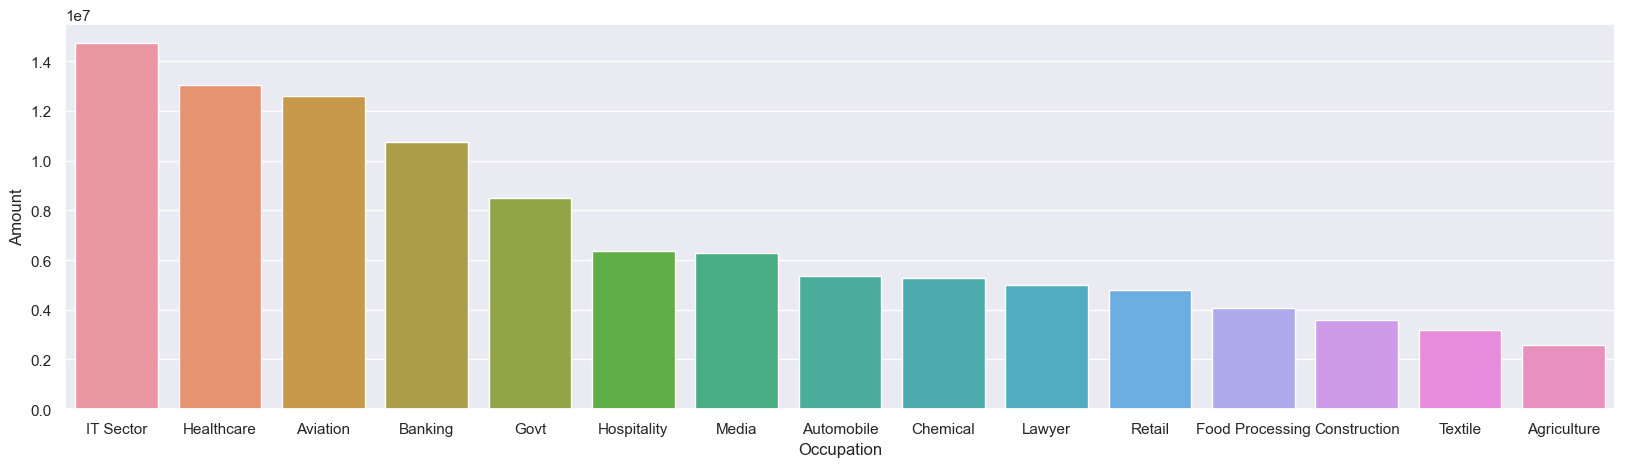

In [129]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

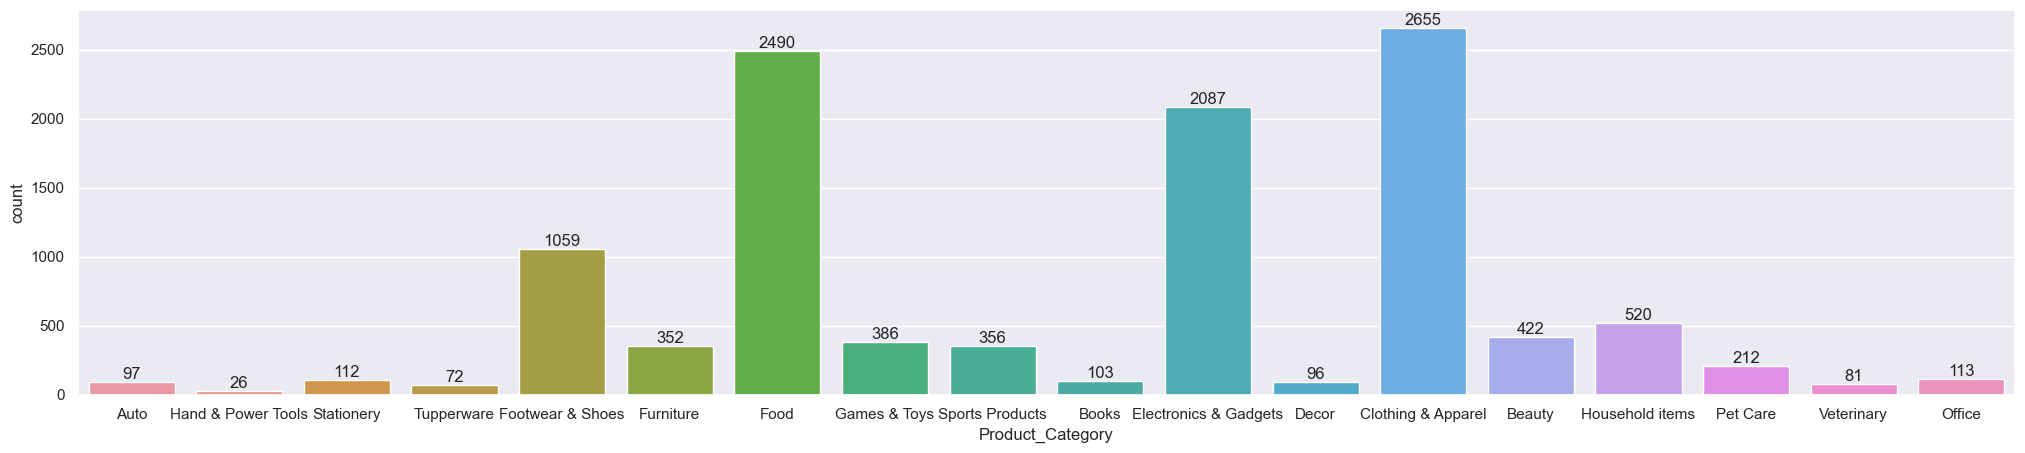

In [132]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

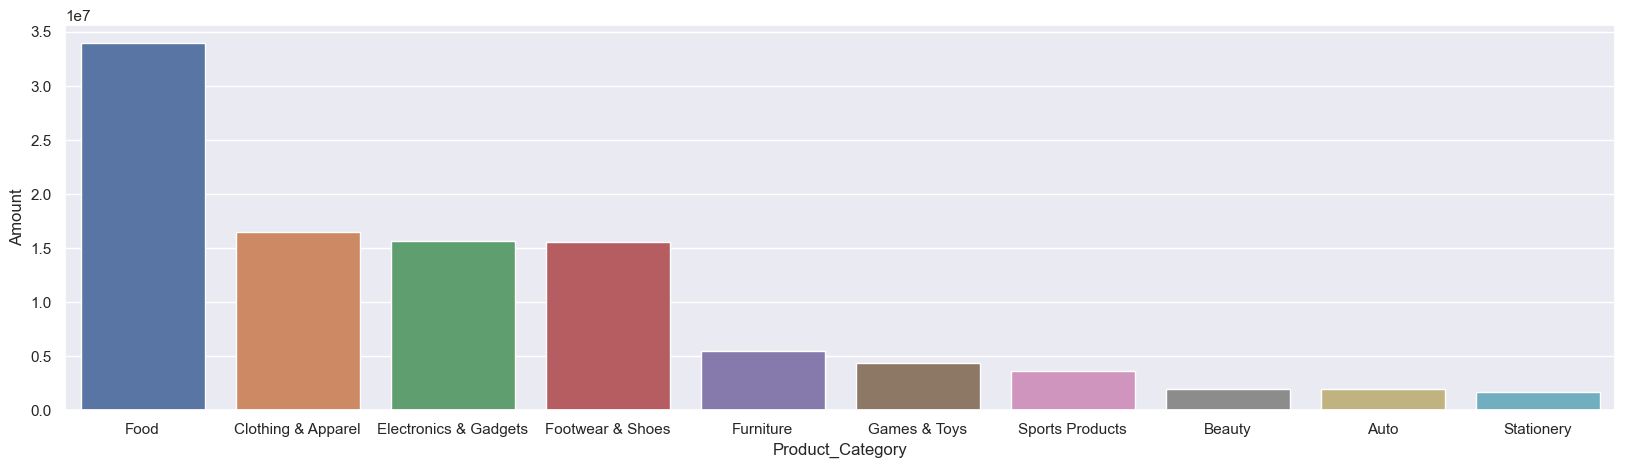

In [133]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category

<Axes: xlabel='Product_ID'>

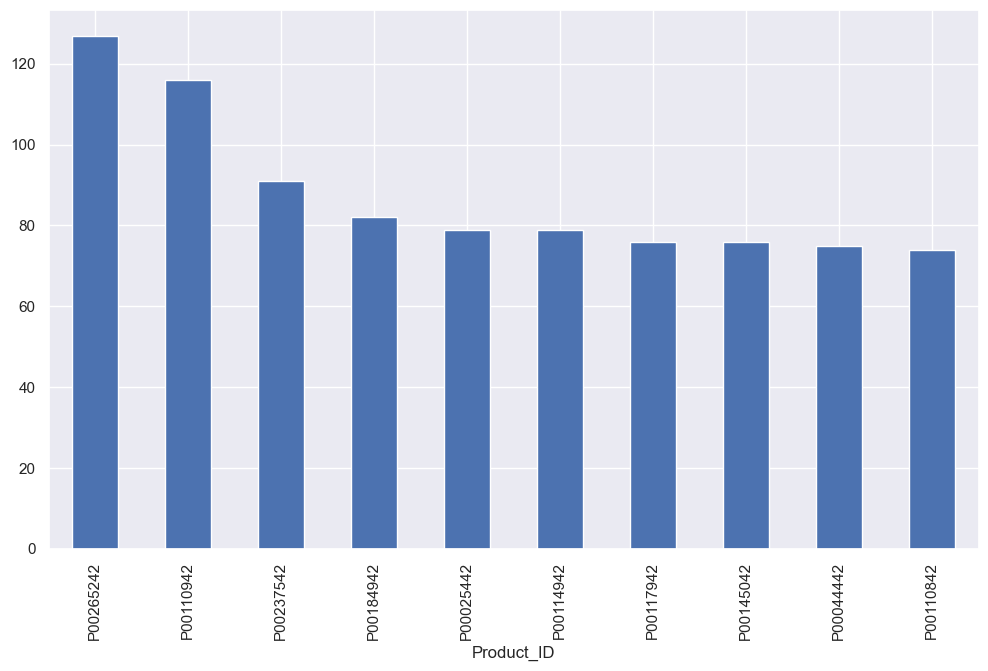

In [134]:

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category